<a href="https://colab.research.google.com/github/tsyet12/Pgraph/blob/main/examples/P_graph_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/tsyet12/Pgraph --quiet

In [ ]:
#import all libraries
from Pgraph.Pgraph import Pgraph #This is our Pgraph library
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
##### STEP 1 : Problem Specification ######
G = nx.DiGraph()
G.add_node("M1",names="Product D",type='product',flow_rate_lower_bound=100, flow_rate_upper_bound=100)
G.add_node("M2",names="Chemical A",type='raw_material',price=200,flow_rate_lower_bound=0)
G.add_node("M3",names="Chemical B", type='raw_material',price=100,flow_rate_lower_bound=0)
G.add_node("M4",names="Chemical C", type='raw_material',price=10,flow_rate_lower_bound=0)
G.add_node("O1",names="Reactor 1",fix_cost=2000, proportional_cost=400)
G.add_node("O2", names="Reactor 2",fix_cost=1000, proportional_cost=400)
G.add_edge("M2","O1", weight = 1)
G.add_edge("M3","O2", weight = 1)
G.add_edge("M4","O2", weight = 2)
G.add_edge("O1","M1", weight = 0.7) 
G.add_edge("O2","M1", weight = 0.9) 
ME=[["O1","O2"]]  #Reactor 1 and Reactor 2 are mutually excluded. Only one can be chosen as solution.
#############################

In [ ]:
#### Step 2:  Setup Solver ####
P=Pgraph(problem_network=G, mutual_exclusion=ME, solver="INSIDEOUT",max_sol=100)
###############################

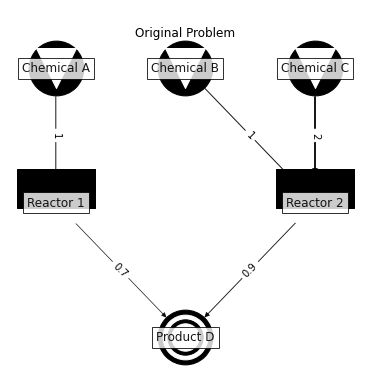

In [ ]:
#### Step 2.1:  Plot Problem #####
ax1=P.plot_problem(figsize=(5,5))
ax1.set_xlim(0,200)
plt.show()
##################################

In [ ]:
#### Step 3: Run ####
P.run()
####################

Installing wine dependencies (only for Linux), this may take longer for the first time. Use skip_wine=True if you are sure wine is installed.


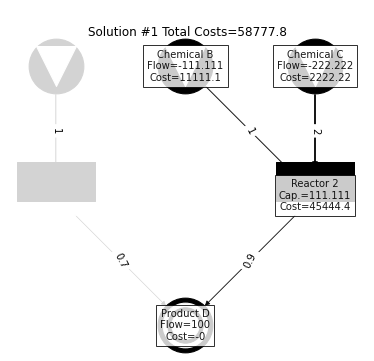

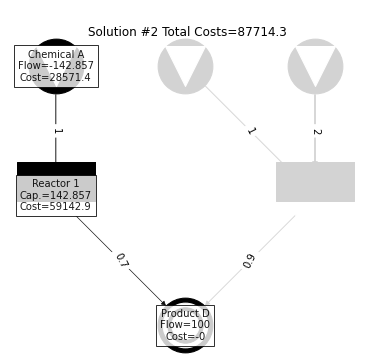

In [ ]:
#### Step 3.1: Plot Solution########
total_sol_num=P.get_sol_num() 
for i in range(total_sol_num): # Here we loop through all the solutions to plot everything
    ax=P.plot_solution(sol_num=i) #Plot Solution Function
    ax.set_xlim(0,200)
    plt.show()
#####################################

In [ ]:
#### Step 3.2: Export to P-graph Studio ####
from google.colab import files #This is only for google colab
string = P.to_studio(path='./',verbose=False) #export to p-graph studio
files.download("./studio_file.pgsx") #download for google colab
############################################

#Note: Please be reminded to press "Generate Layout" button in P-graph Studio after opening

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>